# Tugas Kelompok Pembelajaran Mesin
### **Nama Anggota**:
1. Achmad Hadzami Setiawan (21/480222/PA/20851)
2. Anggit Ihsananto (21/477580/PA/20677)
3. Josiah Farrel Suwito (21/473370/PA/20381)
4. Muhammad Mahdi (21/473808/PA/20431)

## Library Set Up

In [1]:
# Data manipulation & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modelling Library
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score

# Additional Library
import os

## Dataset
Dataset yang kami gunakan berasal dari: [kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) atau dapat langsung diunduh melalui tautan [drive](https://drive.google.com/file/d/1PRSM-PC8-ZAeD6K_ZzdOgP5rgxqC04Wn/view?usp=sharing)

In [2]:
PATH_TO_DATA = "./data.csv" # Atau sesuaikan ke lokasi data

df = pd.read_csv(PATH_TO_DATA)

In [3]:
pd.read_csv(PATH_TO_DATA)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
unneeded_column = 'Unnamed: 32'
df.drop(unneeded_column, axis=1, inplace=True)

In [5]:
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


## EDA

In [6]:
print(f"Number of columns: {df.shape[1]} attribute")
print(f"Number of rows: {df.shape[0]} data")
print(df.columns)

Number of columns: 32 attribute
Number of rows: 569 data
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
is_null = df.isnull().values.any()

is_duplicated = df[df.duplicated()].shape[0] > 0

print(f"Data null: {is_null}")
print(f"Data duplikat: {is_duplicated}")

Data null: False
Data duplikat: False


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [9]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### Distribusi Data

In [10]:
fig = px.histogram(df, x="diagnosis",
                   color="diagnosis",
                   title="Distribusi Malignant vs Benign")

fig.update_layout(
    xaxis_title="Diagnosis",
    yaxis_title="Count",
    legend_title="Diagnosis",
)


## Preprocessing

### Hapus kolom yang tidak diperlukan

In [11]:
df.drop('id', axis=1, inplace=True)

### Label Encoding

In [12]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)

In [13]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

### Data Original

In [14]:
features = df.columns.tolist()
features.remove("diagnosis")

X_original = df[features]
y_original = df["diagnosis"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

In [16]:
X_train.T

,68,181,63,248,60,15,290,137,155,517,...,330,214,466,121,20,71,106,270,435,102
radius_mean,9.029000,21.090000,9.173000,10.650000,10.170000,14.540000,14.410000,11.430000,12.250000,19.890000,...,16.030000,14.190000,13.140000,18.660000,13.080000,8.88800,11.64000,14.290000,13.980000,12.180000
texture_mean,17.330000,26.570000,13.860000,25.220000,14.880000,27.540000,19.730000,15.390000,17.940000,20.260000,...,15.510000,23.810000,20.740000,17.120000,15.710000,14.64000,18.33000,16.820000,19.620000,20.520000
perimeter_mean,58.790000,142.700000,59.200000,68.010000,64.550000,96.730000,96.030000,73.060000,78.270000,130.500000,...,105.800000,92.870000,85.980000,121.400000,85.630000,58.79000,75.17000,90.300000,91.120000,77.220000
area_mean,250.500000,1311.000000,260.900000,347.000000,311.900000,658.800000,651.000000,399.800000,460.300000,1214.000000,...,793.200000,610.700000,536.900000,1077.000000,520.000000,244.00000,412.50000,632.600000,599.500000,458.700000
smoothness_mean,0.106600,0.114100,0.077210,0.096570,0.113400,0.113900,0.087570,0.096390,0.086540,0.103700,...,0.094910,0.094630,0.086750,0.105400,0.107500,0.09783,0.11420,0.064290,0.106000,0.080130
compactness_mean,0.141300,0.283200,0.087510,0.072340,0.080610,0.159500,0.167600,0.068890,0.066790,0.131000,...,0.137100,0.130600,0.108900,0.110000,0.127000,0.15310,0.10170,0.026750,0.113300,0.040380
concavity_mean,0.313000,0.248700,0.059880,0.023790,0.010840,0.163900,0.136200,0.035030,0.038850,0.141100,...,0.120400,0.111500,0.108500,0.145700,0.045680,0.08606,0.07070,0.007250,0.112600,0.023830
concave points_mean,0.043750,0.149600,0.021800,0.016150,0.012900,0.073640,0.066020,0.028750,0.023310,0.094310,...,0.070410,0.064620,0.035100,0.086650,0.031100,0.02872,0.03485,0.006250,0.064630,0.017700
symmetry_mean,0.211100,0.239500,0.234100,0.189700,0.274300,0.230300,0.171400,0.173400,0.197000,0.180200,...,0.178200,0.223500,0.156200,0.196600,0.196700,0.19020,0.18010,0.150800,0.166900,0.173900
fractal_dimension_mean,0.080460,0.073980,0.069630,0.063290,0.069600,0.070770,0.071920,0.058650,0.062280,0.061880,...,0.059760,0.064330,0.060200,0.062130,0.068110,0.08980,0.06520,0.053760,0.065440,0.056770


### Fitur dengan normalisasi (Scalling)


In [17]:
# revisi
# 1. dibagi dulu msl (80:20)
# 2. yg discale hanya X train
# 3. transform X test ke var yg beda
# output: x_train_normalized_min_max dan x_test_normalized_min_max

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Normalisasi Min-Max

In [18]:
scaler = MinMaxScaler()

X_min_max = pd.DataFrame(scaler.fit_transform(X_train),
                         columns=X_train.columns)

X_min_max.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,0.314738,0.173163,0.0,0.196582,0.274695,0.394192,1.0
texture_mean,455.0,0.320427,0.144268,0.0,0.218465,0.303348,0.401589,1.0
perimeter_mean,455.0,0.312720,0.173012,0.0,0.193342,0.270736,0.397140,1.0
area_mean,455.0,0.207662,0.152297,0.0,0.107226,0.163606,0.256243,1.0
smoothness_mean,455.0,0.389221,0.125693,0.0,0.299675,0.379074,0.468719,1.0
compactness_mean,455.0,0.288471,0.179681,0.0,0.148997,0.245154,0.383261,1.0
concavity_mean,455.0,0.208290,0.186195,0.0,0.068697,0.144189,0.310098,1.0
concave points_mean,455.0,0.239960,0.189166,0.0,0.101093,0.166054,0.367271,1.0
symmetry_mean,455.0,0.343826,0.146756,0.0,0.241057,0.333689,0.422317,1.0
fractal_dimension_mean,455.0,0.269519,0.151847,0.0,0.161858,0.242628,0.339933,1.0


#### Normalisasi Mean

In [19]:
mean = X_train.mean()
std = X_train.std()

X_mean = (X_train - mean) / std

X_mean.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,-3.006142e-16,1.0,-1.817582,-0.682342,-0.231244,0.458838,3.957324
texture_mean,455.0,-2.928061e-17,1.0,-2.221056,-0.706758,-0.118385,0.562580,4.710489
perimeter_mean,455.0,-1.288347e-16,1.0,-1.807507,-0.690002,-0.242671,0.487943,3.972439
area_mean,455.0,3.904081e-16,1.0,-1.363535,-0.659479,-0.289279,0.318987,5.202586
smoothness_mean,455.0,-2.498612e-16,1.0,-3.096603,-0.712420,-0.080731,0.632477,4.859294
compactness_mean,455.0,-5.660917e-17,1.0,-1.605461,-0.776233,-0.241075,0.527548,3.959953
concavity_mean,455.0,-7.320152e-17,1.0,-1.118668,-0.749713,-0.344267,0.546785,4.252055
concave points_mean,455.0,2.127724e-16,1.0,-1.268513,-0.734097,-0.390693,0.673016,4.017849
symmetry_mean,455.0,1.483551e-16,1.0,-2.342852,-0.700275,-0.069075,0.534840,4.471203
fractal_dimension_mean,455.0,5.055785e-16,1.0,-1.774935,-0.709012,-0.177090,0.463712,4.810626


### Seleksi Fitur + Feature Scalling
#### Melihat Korelasi


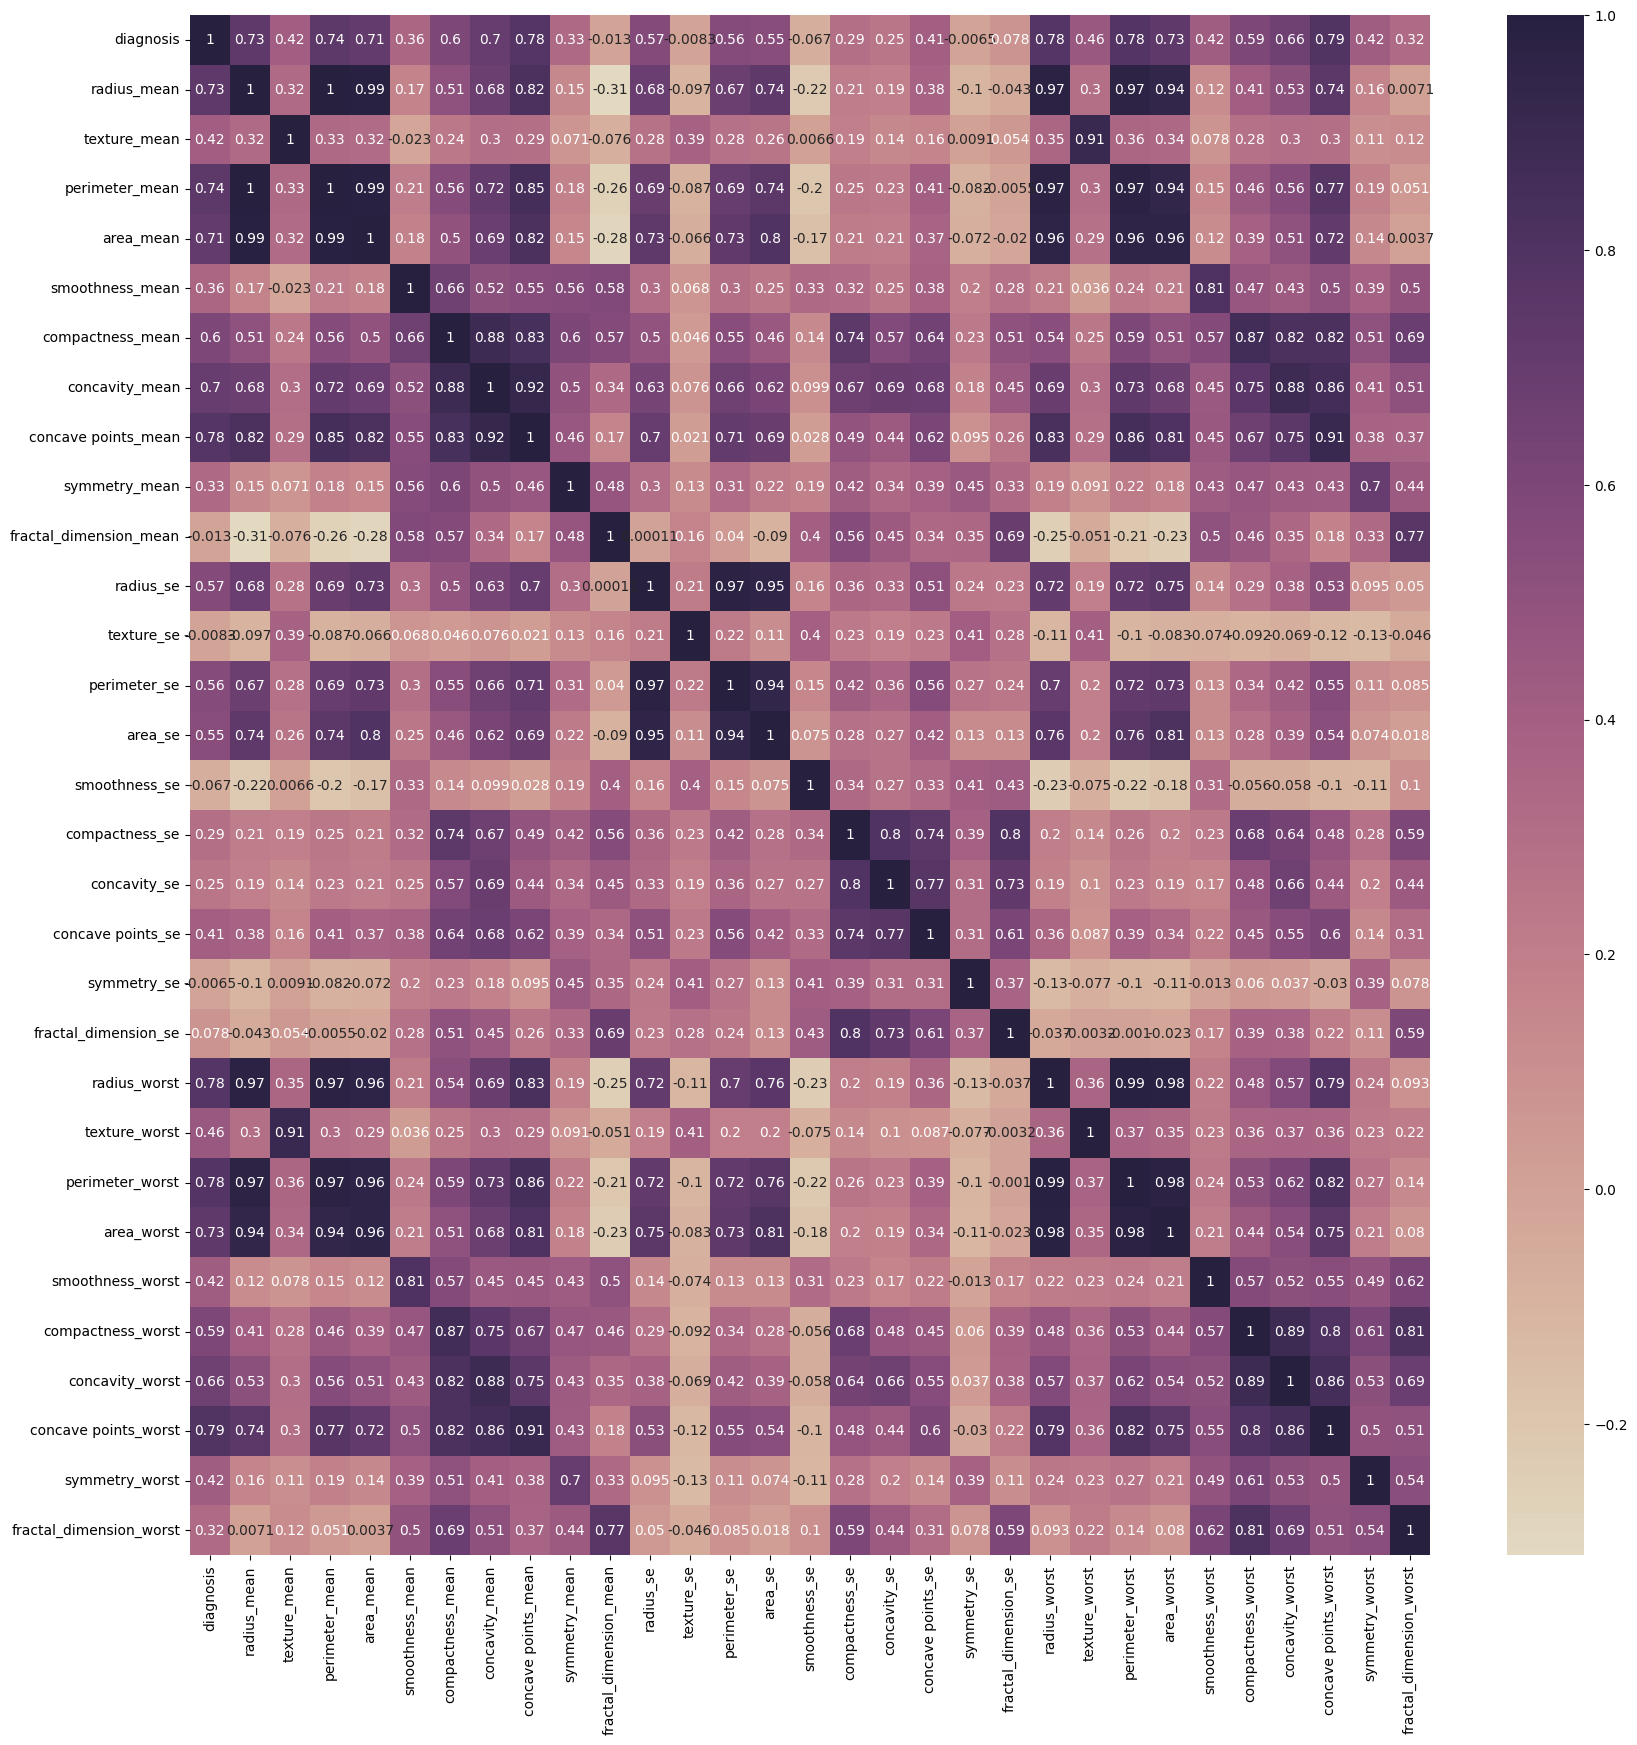

In [20]:
# Ini adalah tabel korelasi jika menggunakan data asli (df)
corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

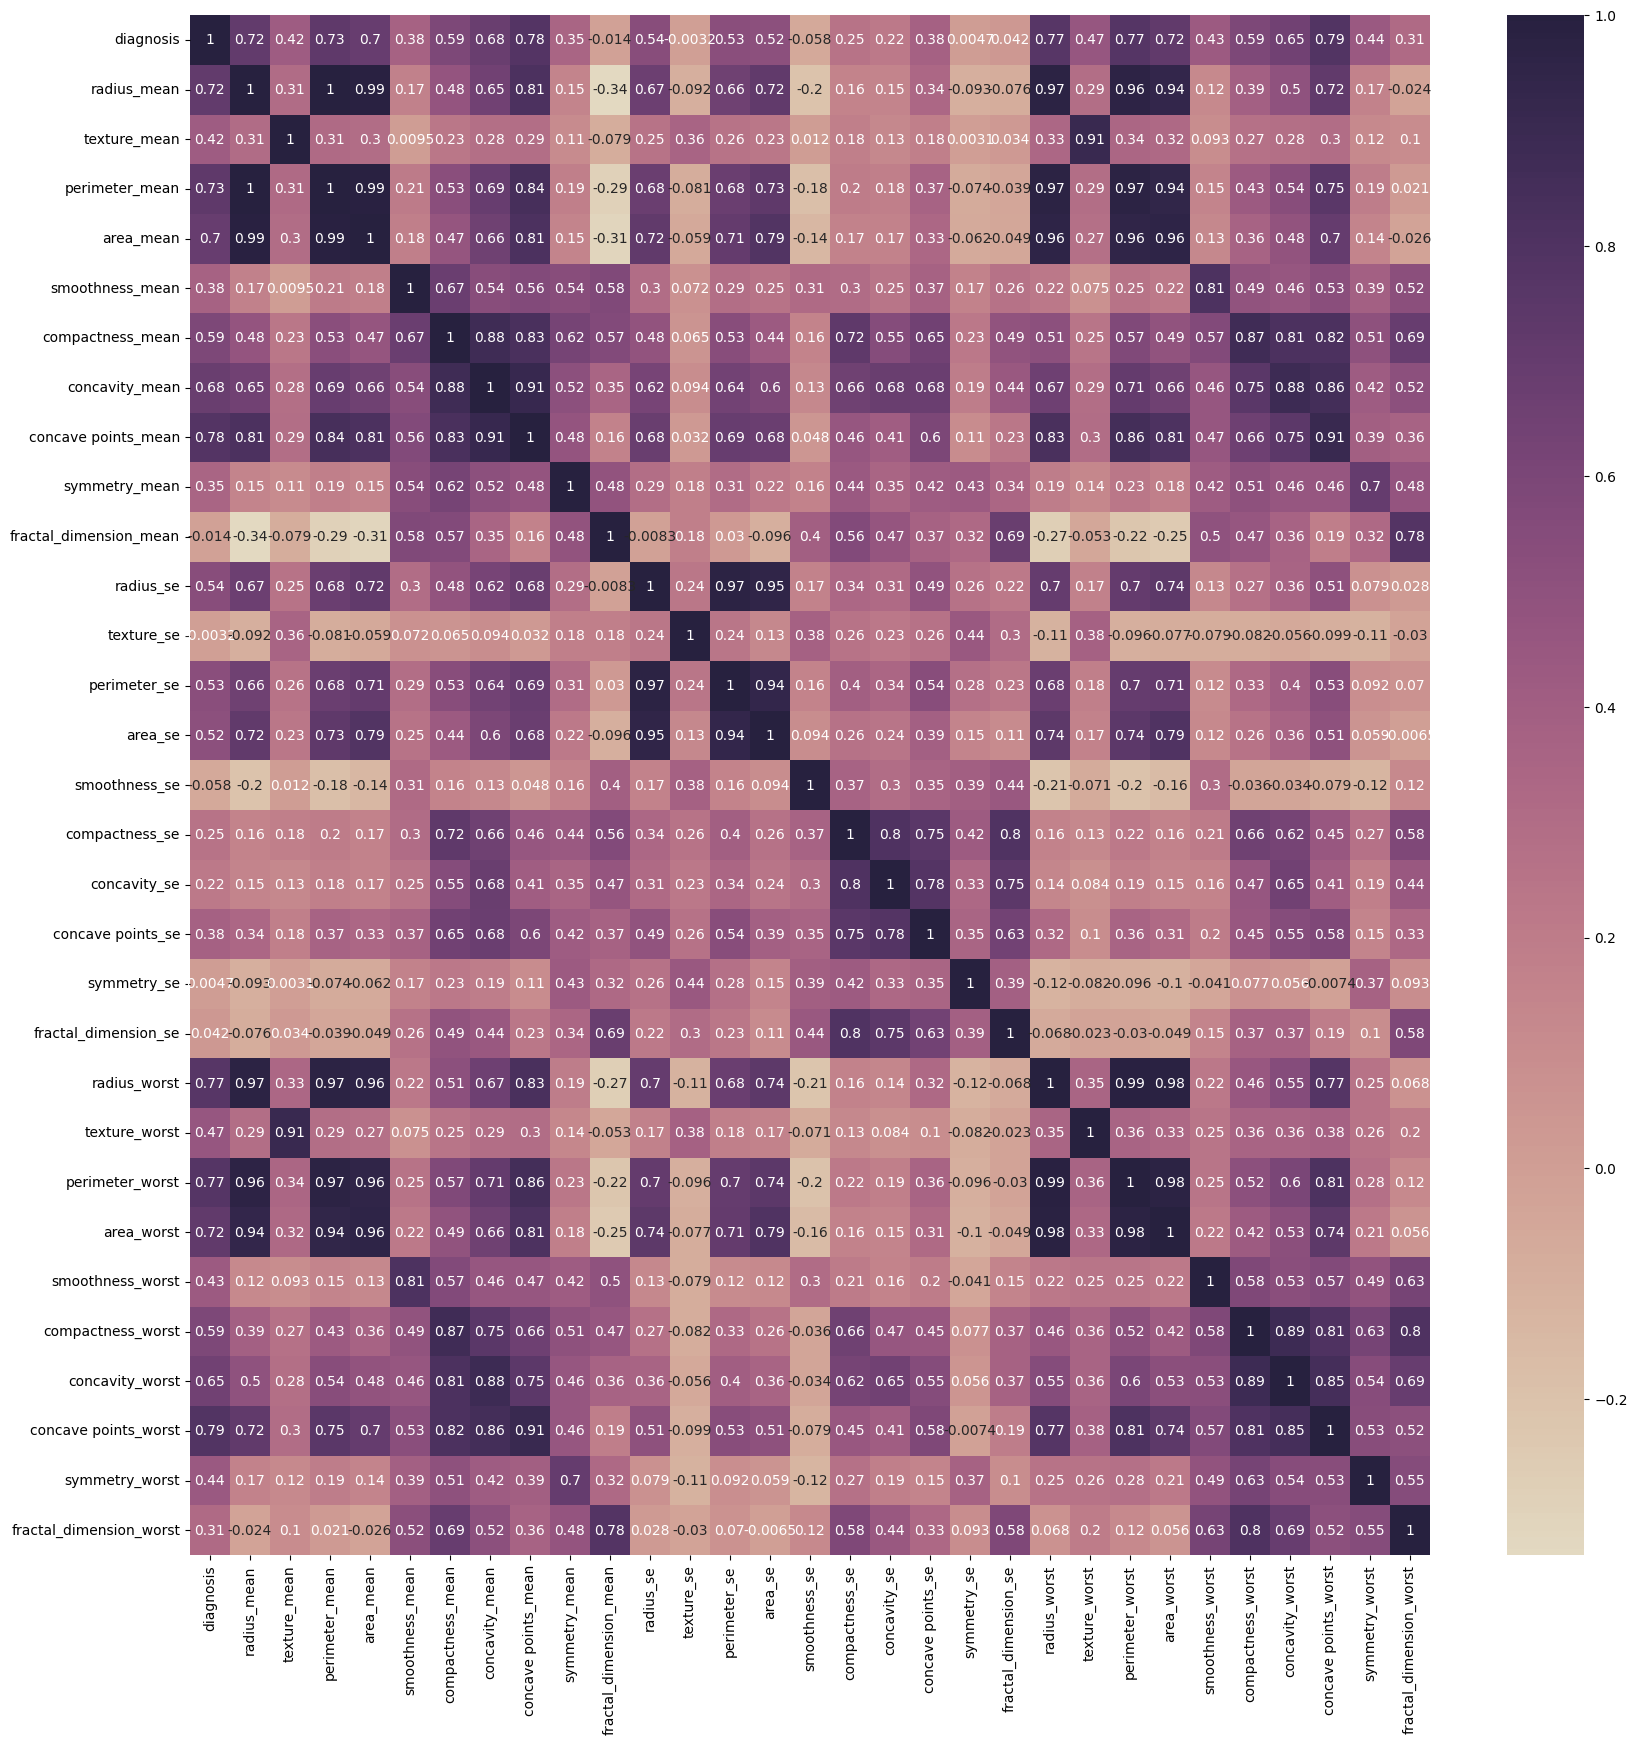

In [21]:
# Ini adalah tabel korelasi jika menggunakan data X_train saja (df80)
df80 = pd.concat([y_train, X_train], axis=1)

corr = df80.corr()
diagnosis_corr = abs(corr["diagnosis"]).sort_values(ascending=False)

plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

In [22]:
diagnosis_corr

diagnosis                  1.000000
concave points_worst       0.788885
concave points_mean        0.778115
perimeter_worst            0.774998
radius_worst               0.766527
perimeter_mean             0.731859
area_worst                 0.722875
radius_mean                0.718073
area_mean                  0.695171
concavity_mean             0.683262
concavity_worst            0.649952
compactness_mean           0.590554
compactness_worst          0.588884
radius_se                  0.540126
perimeter_se               0.529211
area_se                    0.517064
texture_worst              0.467479
symmetry_worst             0.440323
smoothness_worst           0.430364
texture_mean               0.416213
concave points_se          0.380240
smoothness_mean            0.375137
symmetry_mean              0.348123
fractal_dimension_worst    0.312994
compactness_se             0.254370
concavity_se               0.216047
smoothness_se              0.058123
fractal_dimension_se       0

#### Hasil nilai korelasi setelah melakkan MinMax Scalling

In [23]:
# Hasil korelasi dengan MinMax Scalling
min_max_df = pd.concat([y_train, X_min_max], axis=1)
min_max_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,0.0,0.050688,0.206967,0.056338,0.025959,0.563059,0.214472,0.096813,0.095626,0.257341,...,0.034720,0.202559,0.050785,0.015085,0.687564,0.229637,0.196166,0.360825,0.268283,0.395558
181,1.0,0.212988,0.623267,0.205790,0.119926,0.314977,0.139100,0.055459,0.118141,0.366791,...,0.179885,0.567964,0.166489,0.085351,0.223664,0.076839,0.044121,0.190619,0.165385,0.096219
63,0.0,0.357951,0.196145,0.352326,0.220587,0.280581,0.308951,0.152413,0.187873,0.381207,...,0.282582,0.194296,0.303543,0.145048,0.288189,0.368336,0.271725,0.473883,0.273802,0.242286
248,0.0,0.250698,0.113290,0.237374,0.145199,0.313803,0.062872,0.021539,0.066103,0.159637,...,0.180981,0.110075,0.163744,0.086120,0.305848,0.029826,0.022029,0.137113,0.042973,0.153866
60,0.0,0.255595,0.223876,0.246194,0.148460,0.241762,0.117389,0.090745,0.118141,0.353444,...,0.190118,0.265991,0.184637,0.093539,0.261699,0.135415,0.140895,0.282990,0.287601,0.122499


In [24]:
corr_min_max = min_max_df.corr()
diagnosis_corr_min_max = abs(corr_min_max["diagnosis"]).sort_values(ascending=False)
diagnosis_corr_min_max

diagnosis                  1.000000
radius_mean                0.096097
perimeter_mean             0.092727
area_mean                  0.089942
concave points_se          0.083266
radius_worst               0.076664
area_worst                 0.071958
perimeter_worst            0.071819
fractal_dimension_worst    0.071643
symmetry_mean              0.067916
symmetry_worst             0.064731
fractal_dimension_mean     0.064651
concave points_mean        0.063655
concave points_worst       0.052060
area_se                    0.048006
compactness_worst          0.043644
perimeter_se               0.035279
smoothness_se              0.030458
concavity_mean             0.026884
radius_se                  0.026143
smoothness_mean            0.020367
concavity_worst            0.018409
symmetry_se                0.014627
compactness_se             0.013907
concavity_se               0.011330
compactness_mean           0.007461
smoothness_worst           0.007284
fractal_dimension_se       0

#### Hasil nilai korelasi setelah melakukan Mean Scalling

In [25]:
# Hasil korelasi dengan Mean Scalling
mean_df = pd.concat([y_train, X_mean], axis=1)
mean_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,0,-1.439169,-0.434841,-1.360587,-1.137865,0.779715,0.718131,2.820030,-0.119019,1.091461,...,-1.231506,-0.475786,-1.246548,-0.972897,0.722100,1.185427,4.667690,0.930988,2.094936,1.884376
181,1,1.971926,1.731120,2.089372,1.849937,1.318392,3.422508,2.010899,2.662102,2.124665,...,2.170924,1.309838,2.079328,2.135055,0.761090,3.262010,1.926500,2.695979,1.889081,2.495092
63,0,-1.398443,-1.248248,-1.343730,-1.108565,-1.331180,-0.307017,-0.365156,-0.695736,1.928211,...,-1.293859,-1.039667,-1.243851,-0.998616,-1.437111,-0.547961,-0.644202,-0.969172,0.596945,0.057831
248,0,-0.980717,1.414665,-0.981507,-0.865991,0.059325,-0.596132,-0.819301,-0.844186,0.312920,...,-0.828286,1.591778,-0.872612,-0.742130,0.795748,-0.728590,-0.774098,-0.808593,0.798049,-0.134349
60,0,-1.116471,-1.009149,-1.123765,-0.964880,1.268115,-0.438519,-0.982260,-0.929577,3.390704,...,-1.083936,-1.333149,-1.115910,-0.895563,-0.174683,-0.993985,-1.207817,-1.353092,1.032407,-0.205506


In [26]:
corr_mean = mean_df.corr()
diagnosis_corr_mean = abs(corr_mean["diagnosis"]).sort_values(ascending=False)
diagnosis_corr_mean

diagnosis                  1.000000
concave points_worst       0.788885
concave points_mean        0.778115
perimeter_worst            0.774998
radius_worst               0.766527
perimeter_mean             0.731859
area_worst                 0.722875
radius_mean                0.718073
area_mean                  0.695171
concavity_mean             0.683262
concavity_worst            0.649952
compactness_mean           0.590554
compactness_worst          0.588884
radius_se                  0.540126
perimeter_se               0.529211
area_se                    0.517064
texture_worst              0.467479
symmetry_worst             0.440323
smoothness_worst           0.430364
texture_mean               0.416213
concave points_se          0.380240
smoothness_mean            0.375137
symmetry_mean              0.348123
fractal_dimension_worst    0.312994
compactness_se             0.254370
concavity_se               0.216047
smoothness_se              0.058123
fractal_dimension_se       0

#### Perbandingan Nilai Korelasi apabila tanpa feature selection, dengan min-max dan mean normalization

In [27]:
df_mean = pd.DataFrame(diagnosis_corr_mean, columns=["corr_mean"]).reset_index()
df_min_max = pd.DataFrame(diagnosis_corr_min_max, columns=["corr_min_max"]).reset_index()
df_corr = pd.DataFrame(diagnosis_corr, columns=["corr"]).reset_index()

# Merge the DataFrames based on the index
merged_df = pd.concat([df_mean["corr_mean"],
                       df_min_max["corr_min_max"],
                       df_corr["corr"]], axis=1)

pd.DataFrame([diagnosis_corr, diagnosis_corr_min_max, diagnosis_corr_mean],
             index=["original", "min_max normalization", "mean normalization"]).T

,original,min_max normalization,mean normalization
diagnosis,1.000000,1.000000,1.000000
concave points_worst,0.788885,0.052060,0.788885
concave points_mean,0.778115,0.063655,0.778115
perimeter_worst,0.774998,0.071819,0.774998
radius_worst,0.766527,0.076664,0.766527
perimeter_mean,0.731859,0.092727,0.731859
area_worst,0.722875,0.071958,0.722875
radius_mean,0.718073,0.096097,0.718073
area_mean,0.695171,0.089942,0.695171
concavity_mean,0.683262,0.026884,0.683262


#### Fungsi tambahan untuk memilih fitur berdasarkan nilai threshold

In [28]:
# Kita ambil fitur tanpa preprocessing dalam feature selection

def get_features(thresold):
    cor_target = abs(corr["diagnosis"]).sort_values(ascending=False)
    relevant_features = cor_target[cor_target>thresold]
    names = relevant_features.index.tolist()
    names.remove('diagnosis')
    return names

selected_feature_names = get_features(0.2)

In [29]:
X_fs_mean = X_mean[selected_feature_names]
X_fs_minmax = X_min_max[selected_feature_names]

### Fitur dengan PCA

In [30]:
pca = PCA(n_components=7)
X_scaled = X_mean.copy()

X_pca = pca.fit_transform(X_scaled)
column_names = [f"PC-{i+1}" for i in range(X_pca.shape[1])]

X_pca = pd.DataFrame(X_pca, columns=column_names)

X_pca.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7
0,4.240236,9.121388,1.502608,-0.650266,4.316554,1.682429,-1.997194
1,9.043801,0.474787,-3.194699,0.703628,0.324104,0.648033,0.847840
2,-2.272872,3.274866,2.813273,-0.267947,-0.582081,2.984765,0.138590
3,-2.507693,0.742925,-0.735225,2.521857,-1.637777,0.087955,0.170663
4,-2.300316,2.662225,1.191573,-1.267207,-3.512555,2.792352,0.538236


In [31]:
X_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,-1.439169,-0.434841,-1.360587,-1.137865,0.779715,0.718131,2.820030,-0.119019,1.091461,2.455470,...,-1.231506,-0.475786,-1.246548,-0.972897,0.722100,1.185427,4.667690,0.930988,2.094936,1.884376
181,1.971926,1.731120,2.089372,1.849937,1.318392,3.422508,2.010899,2.662102,2.124665,1.556682,...,2.170924,1.309838,2.079328,2.135055,0.761090,3.262010,1.926500,2.695979,1.889081,2.495092
63,-1.398443,-1.248248,-1.343730,-1.108565,-1.331180,-0.307017,-0.365156,-0.695736,1.928211,0.953329,...,-1.293859,-1.039667,-1.243851,-0.998616,-1.437111,-0.547961,-0.644202,-0.969172,0.596945,0.057831
248,-0.980717,1.414665,-0.981507,-0.865991,0.059325,-0.596132,-0.819301,-0.844186,0.312920,0.073960,...,-0.828286,1.591778,-0.872612,-0.742130,0.795748,-0.728590,-0.774098,-0.808593,0.798049,-0.134349
60,-1.116471,-1.009149,-1.123765,-0.964880,1.268115,-0.438519,-0.982260,-0.929577,3.390704,0.949168,...,-1.083936,-1.333149,-1.115910,-0.895563,-0.174683,-0.993985,-1.207817,-1.353092,1.032407,-0.205506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.479046,-1.065407,-1.360587,-1.156178,0.149822,0.943019,-0.035714,-0.513919,0.331110,3.750945,...,-1.351433,-1.626631,-1.334639,-1.043888,-0.469279,-0.058974,-0.626532,-1.015249,-1.030894,1.374512
106,-0.700725,-0.200429,-0.687124,-0.681454,1.325574,-0.036579,-0.229000,-0.352859,-0.036332,0.338880,...,-0.643303,0.614055,-0.646991,-0.625866,1.614550,0.085529,0.060676,0.116612,-0.156801,0.397927
270,0.048748,-0.554391,-0.065054,-0.061355,-2.259140,-1.465001,-1.027436,-1.104300,-1.102279,-1.247868,...,-0.275417,-0.805541,-0.379423,-0.338905,-1.986878,-1.305569,-1.126727,-1.237671,-0.707859,-1.270057
435,-0.038926,0.101961,-0.031340,-0.154609,0.736621,0.184498,0.298257,0.429586,-0.516554,0.372169,...,0.167294,0.867966,0.203654,-0.013541,1.289629,0.671281,0.631837,1.048858,0.433844,1.212028


In [32]:
df_temp = pd.DataFrame(X_scaled)

pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=column_names,  # so the columns are the principal components
    index=X_scaled.columns,  # and the rows are the original features
)

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7
radius_mean,0.216015,-0.240040,-0.001423,-0.039279,0.048109,0.020024,-0.146058
texture_mean,0.101700,-0.051263,0.025268,0.617270,0.015640,-0.077464,0.023617
perimeter_mean,0.225181,-0.222161,-0.002585,-0.040768,0.047323,0.016373,-0.133641
area_mean,0.218535,-0.236489,0.036273,-0.050586,0.015324,-0.002223,-0.079358
smoothness_mean,0.148982,0.169316,-0.122016,-0.129085,-0.396840,-0.254114,-0.116084
compactness_mean,0.240836,0.150134,-0.071950,-0.045088,0.005108,-0.021921,0.038680
concavity_mean,0.259500,0.064037,0.006448,-0.034479,0.089789,-0.021268,-0.086077
concave points_mean,0.263324,-0.039640,-0.028521,-0.059792,-0.051237,-0.040121,-0.153123
symmetry_mean,0.146217,0.183280,-0.048728,-0.002021,-0.275207,0.375999,-0.076613
fractal_dimension_mean,0.065741,0.361447,-0.026185,-0.066712,-0.071305,-0.116902,0.283702


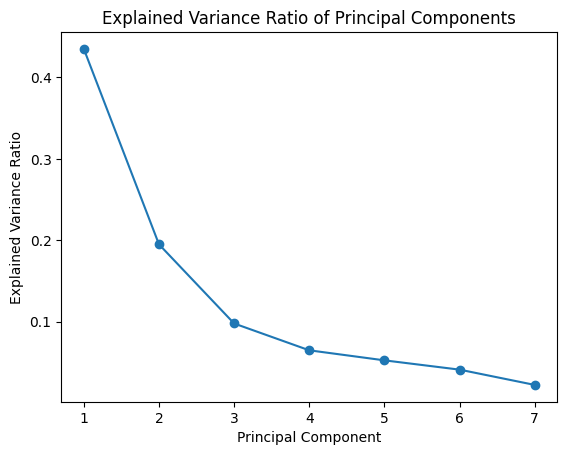

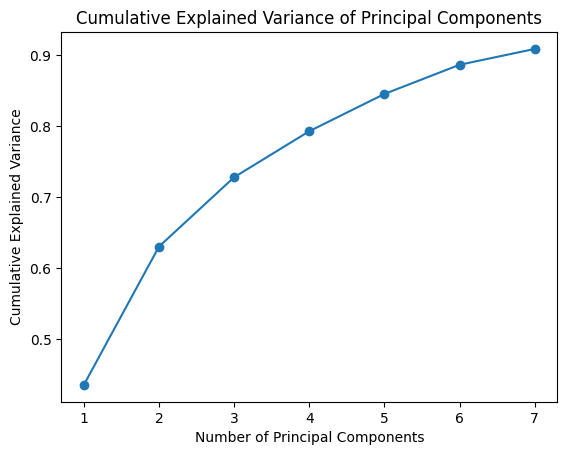

In [33]:
# Calculate the explained variance ratio
explained_var = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_var = np.cumsum(explained_var)

# Plot the explained variance ratio
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance of Principal Components')
plt.show()

## Kumpulan Variabel
Variabel yang digunakan sebagai input training
1. ***X_train***: data original
2. ***X_min_max***: variabel hasil min-max scalling
2. ***X_mean***: variabel hasil mean scalling
3. ***X_fs_mean***: variabel hasil feature selection dan mean scalling
4. ***X_fs_min_max***: variabel hasil feature selection dan min-max scalling
5. ***X_test***: variabel data tes
6. ***y_train***: label train
7. ***y_test***: label test



## Modelling
### Library

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Utility Function

In [35]:
def eval(X_train, y_train,
         X_test, y_test,
         model, mode='default',
         debug=False, printResult=True):
  if mode == 'min-max':
    scaler = MinMaxScaler()
    X_test = pd.DataFrame(scaler.fit_transform(X_test),
                             columns=X_test.columns)
  elif mode == 'mean':
    mean = X_test.mean()
    std = X_test.std()

    X_test = (X_test - mean) / std
  elif mode == 'fs':
    mean = X_test.mean()
    std = X_test.std()

    X_test = (X_test - mean) / std

    names = get_features(0.2)
    X_test = X_test[names]
  elif mode == 'pca':
    pca = PCA(n_components=7)
    mean = X_test.mean()
    std = X_test.std()

    X_test = (X_test - mean) / std

    X_scaled = X_test.copy()

    X_pca = pca.fit_transform(X_scaled)
    column_names = [f"PC-{i+1}" for i in range(X_pca.shape[1])]

    X_test = pd.DataFrame(X_pca, columns=column_names)
  elif mode == 'default':
    pass
  else:
    raise Exception('mode is not supported')

  if debug:
    print("X train:\n\n", X_train)
    print("X test:\n\n", X_test)

  model.fit(X_train, y_train)

  predictions = model.predict(X_test)

  cm = confusion_matrix(y_test, predictions)
  cm = pd.DataFrame(cm, index=['Benign', 'Malignant'], columns = ['Predicted Benign', 'Predicted Malignant'])


  accuracy = accuracy_score(y_test, predictions)

  f1 = f1_score(y_test, predictions)

  if printResult:
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(classification_report(y_test, predictions, digits=4))

  return (accuracy, f1)

## 1. Model Logistic **Regression**

In [36]:
lrModel = LogisticRegression(max_iter=10000)

### Data Original

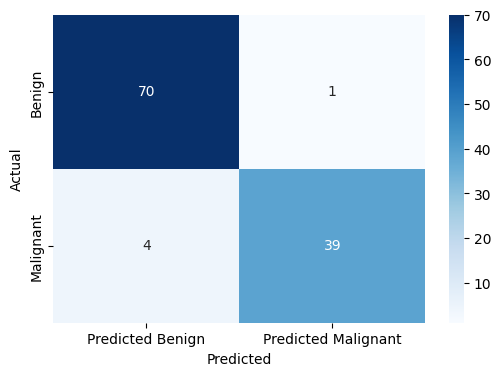

              precision    recall  f1-score   support

           0     0.9459    0.9859    0.9655        71
           1     0.9750    0.9070    0.9398        43

    accuracy                         0.9561       114
   macro avg     0.9605    0.9464    0.9526       114
weighted avg     0.9569    0.9561    0.9558       114



(0.956140350877193, 0.9397590361445783)

In [37]:
eval(X_train, y_train, X_test, y_test, lrModel)

### Data Mean Scalling


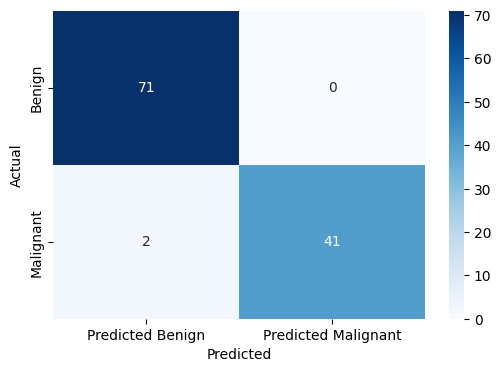

              precision    recall  f1-score   support

           0     0.9726    1.0000    0.9861        71
           1     1.0000    0.9535    0.9762        43

    accuracy                         0.9825       114
   macro avg     0.9863    0.9767    0.9812       114
weighted avg     0.9829    0.9825    0.9824       114



(0.9824561403508771, 0.9761904761904763)

In [38]:
eval(X_mean, y_train, X_test, y_test, lrModel, mode='mean')

### Data Min-Max Scalling

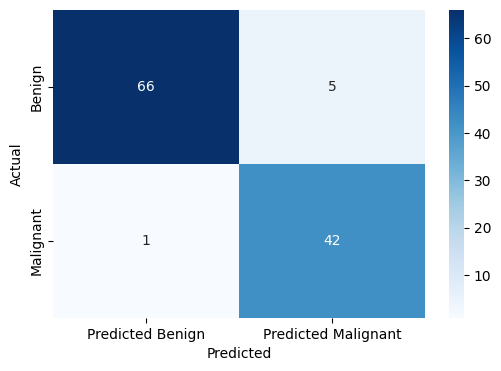

              precision    recall  f1-score   support

           0     0.9851    0.9296    0.9565        71
           1     0.8936    0.9767    0.9333        43

    accuracy                         0.9474       114
   macro avg     0.9393    0.9532    0.9449       114
weighted avg     0.9506    0.9474    0.9478       114



(0.9473684210526315, 0.9333333333333332)

In [39]:
eval(X_min_max, y_train, X_test, y_test, lrModel, mode='min-max')

### Data Feature Selection

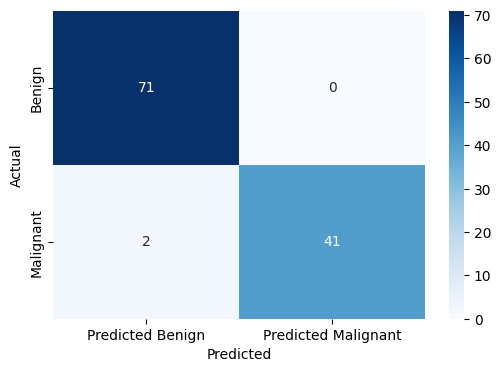

              precision    recall  f1-score   support

           0     0.9726    1.0000    0.9861        71
           1     1.0000    0.9535    0.9762        43

    accuracy                         0.9825       114
   macro avg     0.9863    0.9767    0.9812       114
weighted avg     0.9829    0.9825    0.9824       114



(0.9824561403508771, 0.9761904761904763)

In [40]:
eval(X_fs_mean, y_train, X_test, y_test, lrModel, mode='fs')

### Data PCA

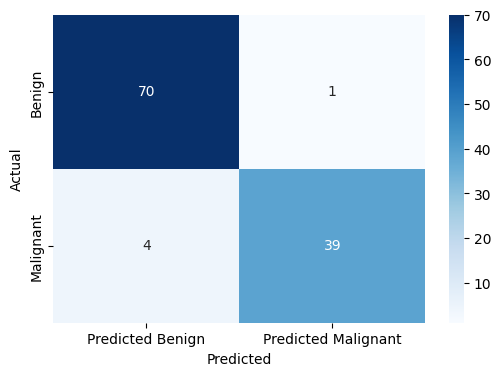

              precision    recall  f1-score   support

           0     0.9459    0.9859    0.9655        71
           1     0.9750    0.9070    0.9398        43

    accuracy                         0.9561       114
   macro avg     0.9605    0.9464    0.9526       114
weighted avg     0.9569    0.9561    0.9558       114



(0.956140350877193, 0.9397590361445783)

In [41]:
eval(X_pca, y_train, X_test, y_test, lrModel, mode='pca')

## 2. Model Decision Tree

In [42]:
dtModel = DecisionTreeClassifier()

### Data Original

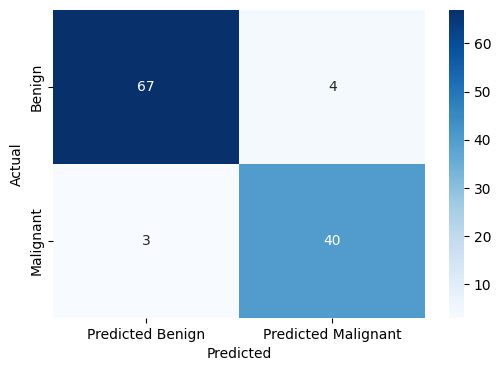

              precision    recall  f1-score   support

           0     0.9571    0.9437    0.9504        71
           1     0.9091    0.9302    0.9195        43

    accuracy                         0.9386       114
   macro avg     0.9331    0.9369    0.9349       114
weighted avg     0.9390    0.9386    0.9387       114



(0.9385964912280702, 0.9195402298850575)

In [43]:
eval(X_train, y_train, X_test, y_test, dtModel)

### Data Min-Max Scalling

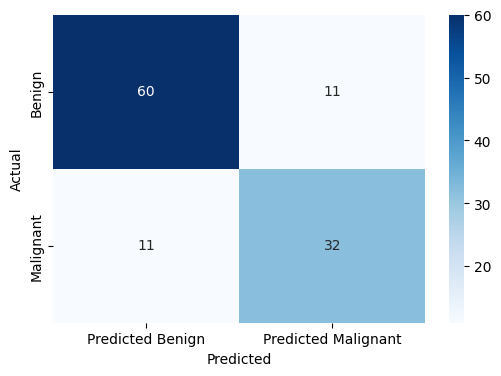

              precision    recall  f1-score   support

           0     0.8451    0.8451    0.8451        71
           1     0.7442    0.7442    0.7442        43

    accuracy                         0.8070       114
   macro avg     0.7946    0.7946    0.7946       114
weighted avg     0.8070    0.8070    0.8070       114



(0.8070175438596491, 0.7441860465116278)

In [44]:
eval(X_min_max, y_train, X_test, y_test, dtModel, mode='min-max')

### Data Mean Scalling

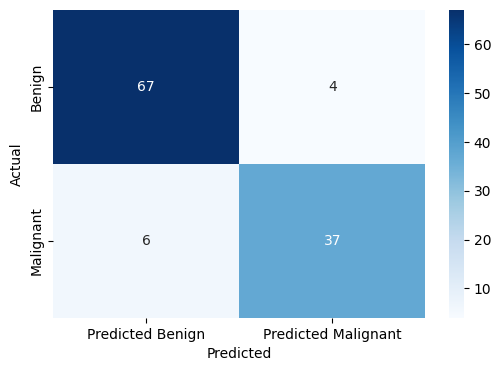

              precision    recall  f1-score   support

           0     0.9178    0.9437    0.9306        71
           1     0.9024    0.8605    0.8810        43

    accuracy                         0.9123       114
   macro avg     0.9101    0.9021    0.9058       114
weighted avg     0.9120    0.9123    0.9118       114



(0.9122807017543859, 0.8809523809523809)

In [45]:
eval(X_mean, y_train, X_test, y_test, dtModel, mode='mean')

### Data Feature Selection

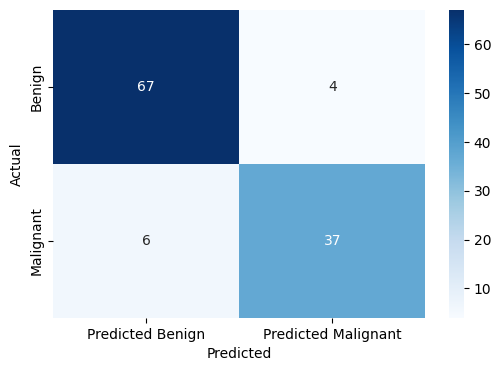

              precision    recall  f1-score   support

           0     0.9178    0.9437    0.9306        71
           1     0.9024    0.8605    0.8810        43

    accuracy                         0.9123       114
   macro avg     0.9101    0.9021    0.9058       114
weighted avg     0.9120    0.9123    0.9118       114



(0.9122807017543859, 0.8809523809523809)

In [46]:
eval(X_fs_mean, y_train, X_test, y_test, dtModel, mode='fs')

### Data PCA

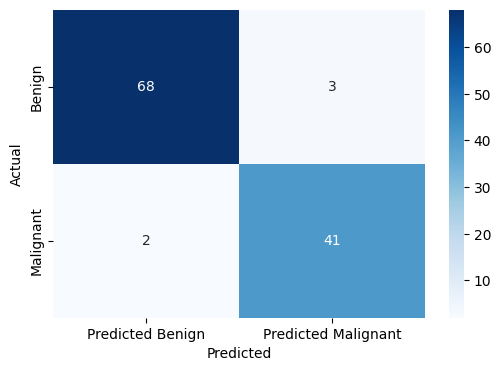

              precision    recall  f1-score   support

           0     0.9714    0.9577    0.9645        71
           1     0.9318    0.9535    0.9425        43

    accuracy                         0.9561       114
   macro avg     0.9516    0.9556    0.9535       114
weighted avg     0.9565    0.9561    0.9562       114



(0.956140350877193, 0.942528735632184)

In [47]:
eval(X_pca, y_train, X_test, y_test, dtModel, mode='pca')

## 3. Model Naive Bayes

In [48]:
nbModel = GaussianNB()

### Data original

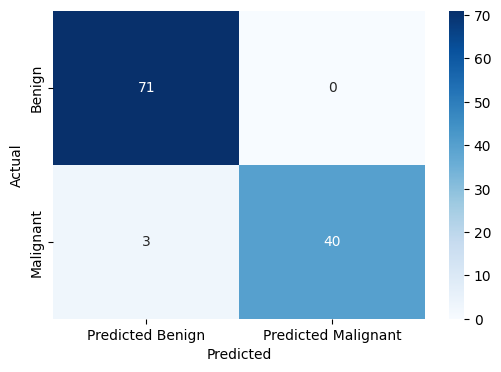

              precision    recall  f1-score   support

           0     0.9595    1.0000    0.9793        71
           1     1.0000    0.9302    0.9639        43

    accuracy                         0.9737       114
   macro avg     0.9797    0.9651    0.9716       114
weighted avg     0.9748    0.9737    0.9735       114



(0.9736842105263158, 0.963855421686747)

In [49]:
eval(X_train, y_train, X_test, y_test, nbModel)

### Dengan MinMax Normalization

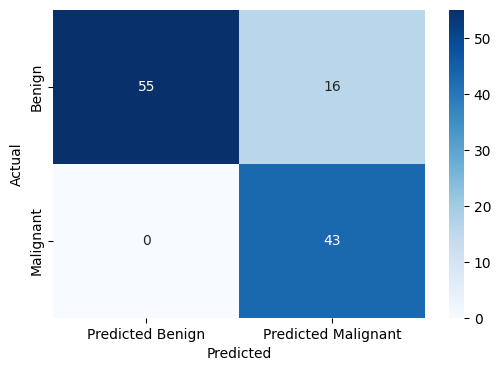

              precision    recall  f1-score   support

           0     1.0000    0.7746    0.8730        71
           1     0.7288    1.0000    0.8431        43

    accuracy                         0.8596       114
   macro avg     0.8644    0.8873    0.8581       114
weighted avg     0.8977    0.8596    0.8617       114



(0.8596491228070176, 0.8431372549019608)

In [50]:
eval(X_min_max, y_train, X_test, y_test, nbModel, mode='min-max')

### Dengan Mean Normalization

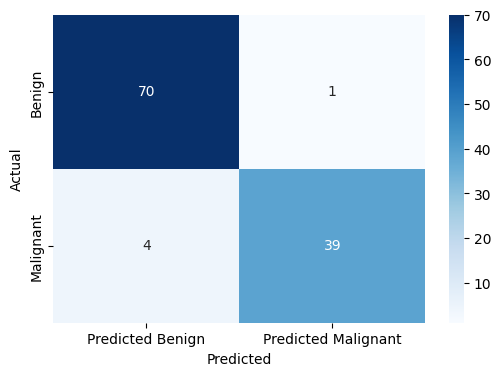

              precision    recall  f1-score   support

           0     0.9459    0.9859    0.9655        71
           1     0.9750    0.9070    0.9398        43

    accuracy                         0.9561       114
   macro avg     0.9605    0.9464    0.9526       114
weighted avg     0.9569    0.9561    0.9558       114



(0.956140350877193, 0.9397590361445783)

In [51]:
eval(X_mean, y_train, X_test, y_test, nbModel, mode='mean')

### Dengan feature selection & mean normalization

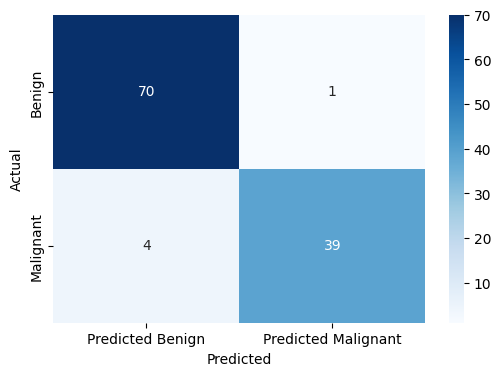

              precision    recall  f1-score   support

           0     0.9459    0.9859    0.9655        71
           1     0.9750    0.9070    0.9398        43

    accuracy                         0.9561       114
   macro avg     0.9605    0.9464    0.9526       114
weighted avg     0.9569    0.9561    0.9558       114



(0.956140350877193, 0.9397590361445783)

In [52]:
eval(X_fs_mean, y_train, X_test, y_test, nbModel, mode='fs')

### Dengan PCA

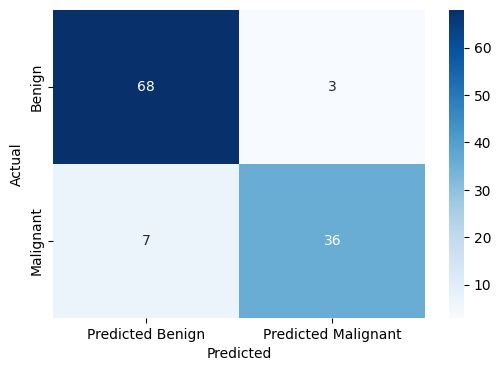

              precision    recall  f1-score   support

           0     0.9067    0.9577    0.9315        71
           1     0.9231    0.8372    0.8780        43

    accuracy                         0.9123       114
   macro avg     0.9149    0.8975    0.9048       114
weighted avg     0.9129    0.9123    0.9113       114



(0.9122807017543859, 0.878048780487805)

In [53]:
eval(X_pca, y_train, X_test, y_test, nbModel, mode='pca')

## 4. Model SVM

In [54]:
svmModel = SVC()

#### Data original

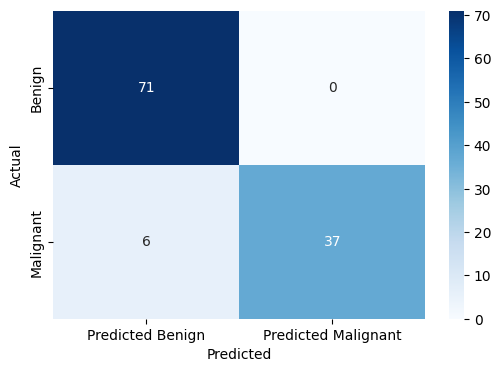

              precision    recall  f1-score   support

           0     0.9221    1.0000    0.9595        71
           1     1.0000    0.8605    0.9250        43

    accuracy                         0.9474       114
   macro avg     0.9610    0.9302    0.9422       114
weighted avg     0.9515    0.9474    0.9465       114



(0.9473684210526315, 0.9249999999999999)

In [55]:
eval(X_train, y_train, X_test, y_test, svmModel)

#### Dengan MinMax Normalization

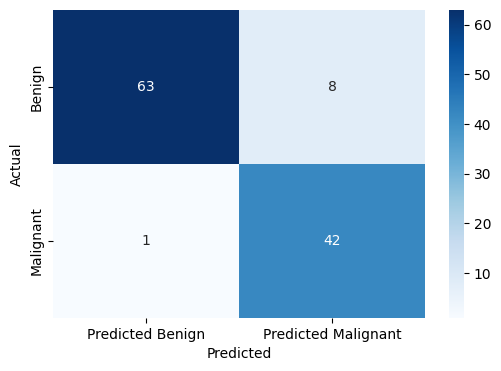

              precision    recall  f1-score   support

           0     0.9844    0.8873    0.9333        71
           1     0.8400    0.9767    0.9032        43

    accuracy                         0.9211       114
   macro avg     0.9122    0.9320    0.9183       114
weighted avg     0.9299    0.9211    0.9220       114



(0.9210526315789473, 0.9032258064516129)

In [56]:
eval(X_min_max, y_train, X_test, y_test, svmModel, mode='min-max')

#### Dengan Mean Normalization

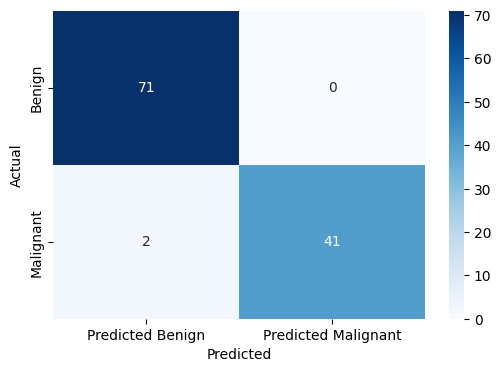

              precision    recall  f1-score   support

           0     0.9726    1.0000    0.9861        71
           1     1.0000    0.9535    0.9762        43

    accuracy                         0.9825       114
   macro avg     0.9863    0.9767    0.9812       114
weighted avg     0.9829    0.9825    0.9824       114



(0.9824561403508771, 0.9761904761904763)

In [57]:
eval(X_mean, y_train, X_test, y_test, svmModel, mode='mean')

#### Dengan Feature Selection & Mean Normalization


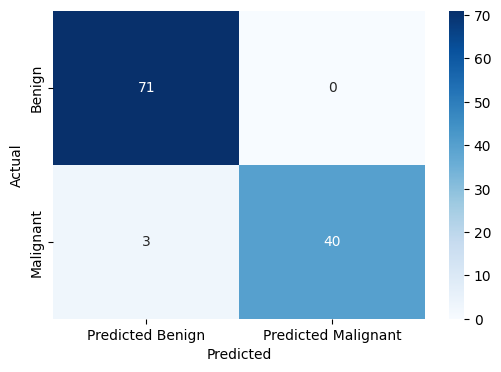

              precision    recall  f1-score   support

           0     0.9595    1.0000    0.9793        71
           1     1.0000    0.9302    0.9639        43

    accuracy                         0.9737       114
   macro avg     0.9797    0.9651    0.9716       114
weighted avg     0.9748    0.9737    0.9735       114



(0.9736842105263158, 0.963855421686747)

In [58]:
eval(X_fs_mean, y_train, X_test, y_test, svmModel,mode='fs')

#### Dengan PCA

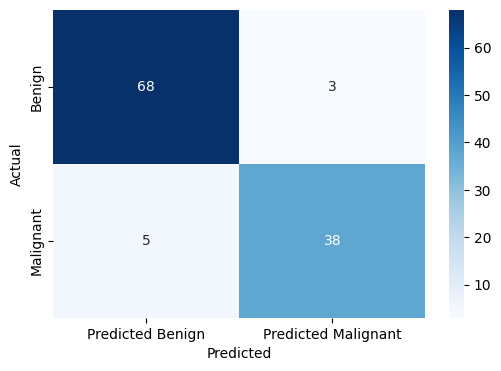

              precision    recall  f1-score   support

           0     0.9315    0.9577    0.9444        71
           1     0.9268    0.8837    0.9048        43

    accuracy                         0.9298       114
   macro avg     0.9292    0.9207    0.9246       114
weighted avg     0.9297    0.9298    0.9295       114



(0.9298245614035088, 0.9047619047619047)

In [59]:
eval(X_pca, y_train, X_test, y_test, svmModel, mode='pca')

## 5. Model KNN

In [60]:
knnModel = KNeighborsClassifier(n_neighbors=5)

### Data Original

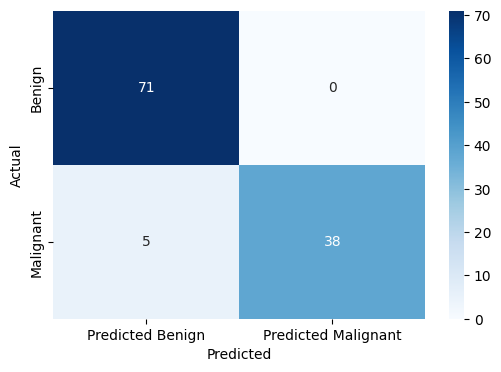

              precision    recall  f1-score   support

           0     0.9342    1.0000    0.9660        71
           1     1.0000    0.8837    0.9383        43

    accuracy                         0.9561       114
   macro avg     0.9671    0.9419    0.9521       114
weighted avg     0.9590    0.9561    0.9555       114



(0.956140350877193, 0.9382716049382717)

In [61]:
eval(X_train, y_train, X_test, y_test, knnModel)

### Dengan MinMax Normalization

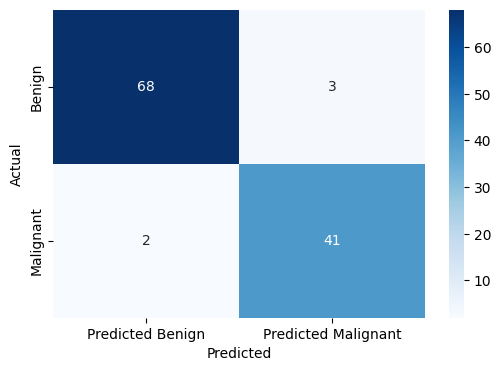

              precision    recall  f1-score   support

           0     0.9714    0.9577    0.9645        71
           1     0.9318    0.9535    0.9425        43

    accuracy                         0.9561       114
   macro avg     0.9516    0.9556    0.9535       114
weighted avg     0.9565    0.9561    0.9562       114



(0.956140350877193, 0.942528735632184)

In [62]:
eval(X_min_max, y_train, X_test, y_test, knnModel, mode='min-max')

### Dengan Mean Normalization

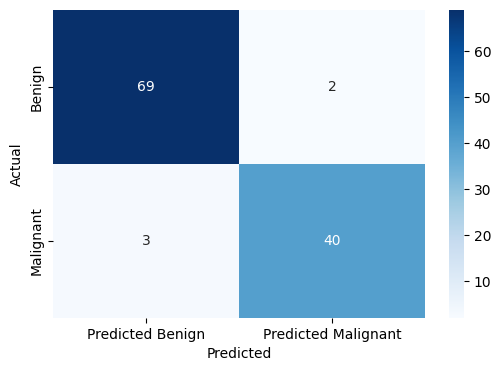

              precision    recall  f1-score   support

           0     0.9583    0.9718    0.9650        71
           1     0.9524    0.9302    0.9412        43

    accuracy                         0.9561       114
   macro avg     0.9554    0.9510    0.9531       114
weighted avg     0.9561    0.9561    0.9560       114



(0.956140350877193, 0.9411764705882352)

In [63]:
eval(X_mean, y_train, X_test, y_test, knnModel, mode='mean')

### Dengan PCA

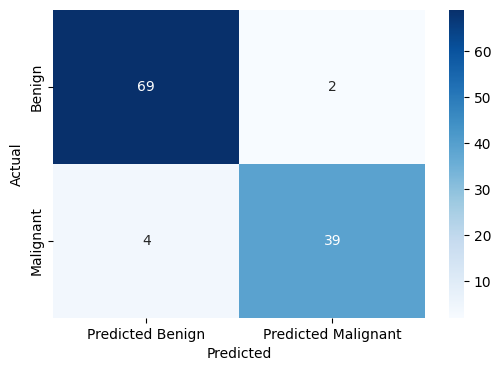

              precision    recall  f1-score   support

           0     0.9452    0.9718    0.9583        71
           1     0.9512    0.9070    0.9286        43

    accuracy                         0.9474       114
   macro avg     0.9482    0.9394    0.9435       114
weighted avg     0.9475    0.9474    0.9471       114



(0.9473684210526315, 0.9285714285714286)

In [64]:
eval(X_pca, y_train, X_test, y_test, knnModel, mode='pca')

### Dengan feature selection & mean normalization

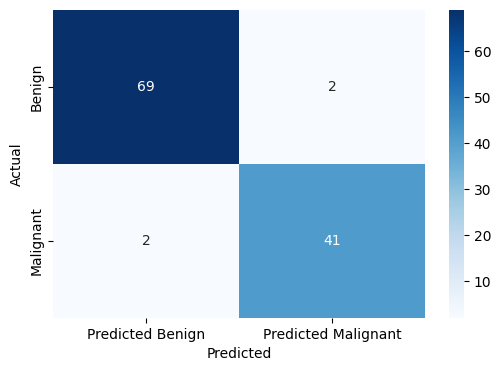

              precision    recall  f1-score   support

           0     0.9718    0.9718    0.9718        71
           1     0.9535    0.9535    0.9535        43

    accuracy                         0.9649       114
   macro avg     0.9627    0.9627    0.9627       114
weighted avg     0.9649    0.9649    0.9649       114



(0.9649122807017544, 0.9534883720930233)

In [65]:
eval(X_fs_mean, y_train, X_test, y_test, knnModel, mode='fs')

## Evaluasi

In [66]:
def eval_multiple(X_train, y_train, X_test, y_test, models, mode='default'):
    results = []
    for model in models:
        classifier_name = type(model).__name__
        result = eval(X_train, y_train, X_test, y_test, model, mode, printResult=False)
        result_with_label = {'Classifier': classifier_name, 'Accuracy': result[0], 'F1 Score': result[1]}
        results.append(result_with_label)

    results_df = pd.DataFrame(results)
    sorted_results_df = results_df.sort_values(['F1 Score', 'Accuracy'], ascending=[False, False])
    sorted_results_df = sorted_results_df.reset_index(drop=True)
    return sorted_results_df


In [67]:
lrModel = LogisticRegression(max_iter=10000)
dtModel = DecisionTreeClassifier()
nbModel = GaussianNB()
svmModel = SVC()
knnModel = KNeighborsClassifier(n_neighbors=5)

models=[lrModel, dtModel, nbModel, svmModel, knnModel]

### Data Original

In [68]:
eval_multiple(X_train, y_train,
              X_test, y_test,
              models)

,Classifier,Accuracy,F1 Score
0,GaussianNB,0.973684,0.963855
1,LogisticRegression,0.956140,0.939759
2,KNeighborsClassifier,0.956140,0.938272
3,SVC,0.947368,0.925000
4,DecisionTreeClassifier,0.929825,0.906977


### Data Min Max

In [69]:
eval_multiple(X_min_max, y_train,
              X_test, y_test,
              models, mode='min-max')

,Classifier,Accuracy,F1 Score
0,KNeighborsClassifier,0.956140,0.942529
1,LogisticRegression,0.947368,0.933333
2,SVC,0.921053,0.903226
3,GaussianNB,0.859649,0.843137
4,DecisionTreeClassifier,0.833333,0.771084


### Data Mean

In [70]:
eval_multiple(X_mean, y_train,
              X_test, y_test,
              models, mode='mean')

,Classifier,Accuracy,F1 Score
0,LogisticRegression,0.982456,0.976190
1,SVC,0.982456,0.976190
2,KNeighborsClassifier,0.956140,0.941176
3,GaussianNB,0.956140,0.939759
4,DecisionTreeClassifier,0.912281,0.878049


### *Data Feature Selection* dengan *Mean Scalling*

In [71]:
eval_multiple(X_fs_mean, y_train,
              X_test, y_test,
              models, mode='fs')

,Classifier,Accuracy,F1 Score
0,LogisticRegression,0.982456,0.976190
1,SVC,0.973684,0.963855
2,KNeighborsClassifier,0.964912,0.953488
3,GaussianNB,0.956140,0.939759
4,DecisionTreeClassifier,0.903509,0.867470


### Data PCA

In [72]:
eval_multiple(X_pca, y_train,
              X_test, y_test,
              models, mode='pca')

,Classifier,Accuracy,F1 Score
0,DecisionTreeClassifier,0.964912,0.954545
1,LogisticRegression,0.956140,0.939759
2,KNeighborsClassifier,0.947368,0.928571
3,SVC,0.929825,0.904762
4,GaussianNB,0.912281,0.878049


# Sudut Pandang lain

In [73]:
datas = [{'data': X_train, 'mode': 'default'},
         {'data': X_mean, 'mode': 'mean'},
         {'data': X_min_max, 'mode': 'min-max'},
         {'data': X_fs_mean, 'mode': 'fs'},
         {'data': X_pca, 'mode': 'pca'}]

models = [lrModel, dtModel, nbModel, svmModel, knnModel]

def compare_feature_engineering(datas, models):
    results = []
    for data in datas:
        X_train = data['data']
        mode = data['mode']
        for model in models:
            classifier_name = type(model).__name__
            result = eval(X_train, y_train, X_test, y_test, model, mode, printResult=False)
            result_with_label = {
                'Classifier': classifier_name,
                'Feature Engineering': mode,
                'Accuracy': result[0],
                'F1 Score': result[1]
            }
            results.append(result_with_label)

    results_df = pd.DataFrame(results)
    sorted_results_df = results_df.sort_values(
        ['Classifier', 'F1 Score', 'Accuracy'],
        ascending=[True, False, False]
    )
    sorted_results_df = sorted_results_df.reset_index(drop=True)
    return sorted_results_df

compare_feature_engineering(datas, models)

,Classifier,Feature Engineering,Accuracy,F1 Score
0,DecisionTreeClassifier,pca,0.956140,0.942529
1,DecisionTreeClassifier,default,0.938596,0.917647
2,DecisionTreeClassifier,mean,0.921053,0.891566
3,DecisionTreeClassifier,fs,0.912281,0.880952
4,DecisionTreeClassifier,min-max,0.807018,0.744186
5,GaussianNB,default,0.973684,0.963855
6,GaussianNB,mean,0.956140,0.939759
7,GaussianNB,fs,0.956140,0.939759
8,GaussianNB,pca,0.912281,0.878049
9,GaussianNB,min-max,0.859649,0.843137
